In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

In [3]:
# Defining date range (last 5 years)
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=5*365)).strftime('%Y-%m-%d')

In [4]:
# List of NSE stocks
stocks = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS"]

In [5]:
# Fetching stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


In [6]:
print(stock_data.info())
print(stock_data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2020-03-30 to 2025-03-26
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, HDFCBANK.NS)   1237 non-null   float64
 1   (Close, INFY.NS)       1237 non-null   float64
 2   (Close, RELIANCE.NS)   1237 non-null   float64
 3   (Close, TCS.NS)        1237 non-null   float64
 4   (High, HDFCBANK.NS)    1237 non-null   float64
 5   (High, INFY.NS)        1237 non-null   float64
 6   (High, RELIANCE.NS)    1237 non-null   float64
 7   (High, TCS.NS)         1237 non-null   float64
 8   (Low, HDFCBANK.NS)     1237 non-null   float64
 9   (Low, INFY.NS)         1237 non-null   float64
 10  (Low, RELIANCE.NS)     1237 non-null   float64
 11  (Low, TCS.NS)          1237 non-null   float64
 12  (Open, HDFCBANK.NS)    1237 non-null   float64
 13  (Open, INFY.NS)        1237 non-null   float64
 14  (Open, RELIANCE.NS)    1237 non-null  

In [7]:
# Checking for missing values
print(stock_data.isnull().sum())

Price   Ticker     
Close   HDFCBANK.NS    0
        INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
High    HDFCBANK.NS    0
        INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Low     HDFCBANK.NS    0
        INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Open    HDFCBANK.NS    0
        INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Volume  HDFCBANK.NS    0
        INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
dtype: int64


In [8]:
# Filling missing values using forward fill
stock_data.fillna(method='ffill', inplace=True)

# Double-checking if missing values are handled
print(stock_data.isnull().sum())


Price   Ticker     
Close   HDFCBANK.NS    0
        INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
High    HDFCBANK.NS    0
        INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Low     HDFCBANK.NS    0
        INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Open    HDFCBANK.NS    0
        INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Volume  HDFCBANK.NS    0
        INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_10636\9482940.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)


In [9]:
# Summary statistics
print(stock_data.describe())

Price         Close                                                High  \
Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS   
count   1237.000000  1237.000000  1237.000000  1237.000000  1237.000000   
mean    1455.416394  1409.733605  1133.867516  3249.039660  1468.987698   
std      210.990904   317.483204   205.644649   632.372704   210.126666   
min      781.278503   525.572266   459.428864  1518.423828   810.221880   
25%     1375.457275  1259.936646   994.226746  2966.692383  1387.169053   
50%     1475.791992  1438.944702  1146.497559  3258.512695  1490.595235   
75%     1607.800049  1612.645874  1247.300049  3622.263184  1620.776885   
max     1871.750000  1999.699951  1595.484985  4531.868164  1880.000000   

Price                                                  Low               \
Ticker      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS   
count   1237.000000  1237.000000  1237.000000  1237.000000  1237.000000   
mean    1423.443169  114

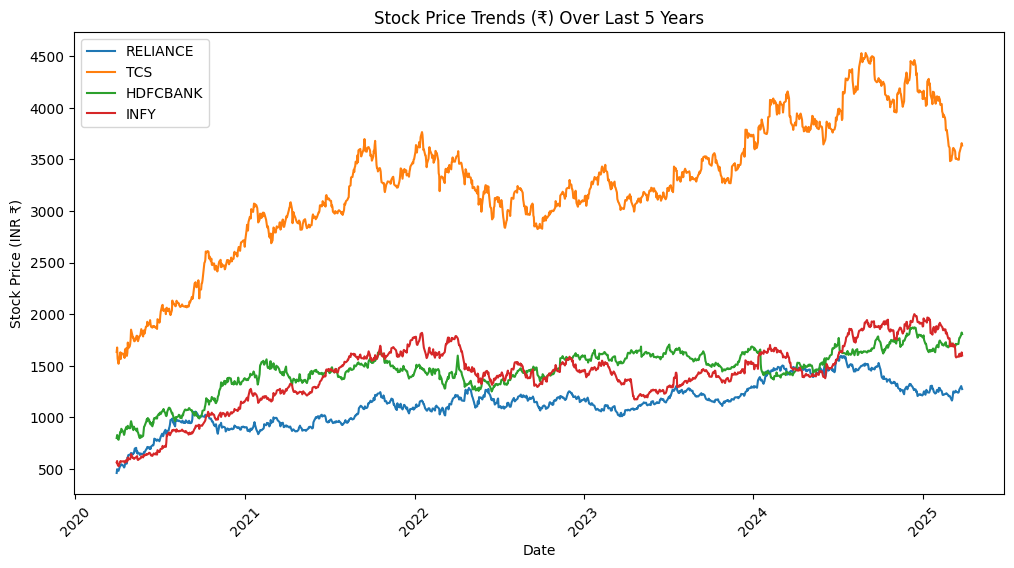

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for stock in stocks:
    plt.plot(stock_data['Close'][stock], label=stock.split('.')[0])

plt.title(f'Stock Price Trends (₹) Over Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Stock Price (INR ₹)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

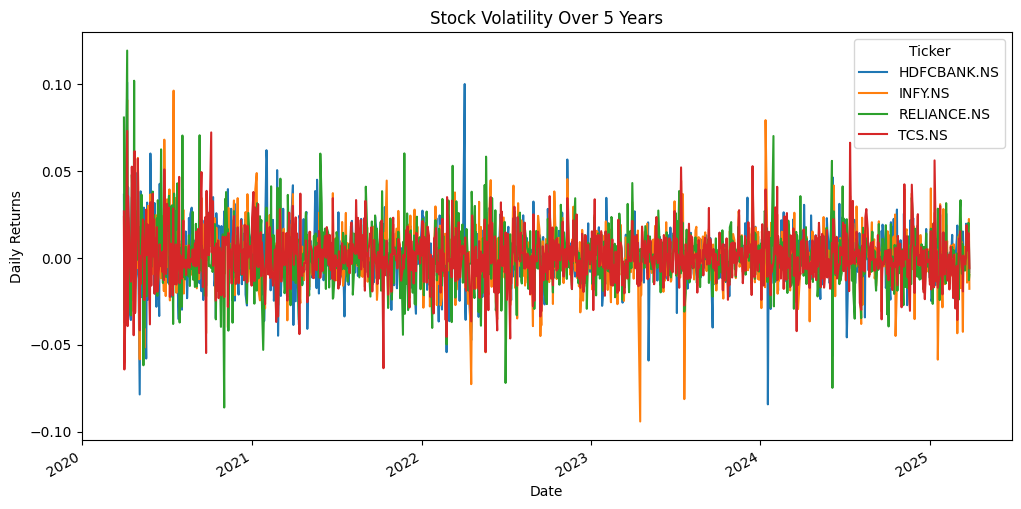

In [11]:
# Calculating daily returns
returns = stock_data['Close'].pct_change()

# Plotting volatility
returns.plot(figsize=(12,6), title="Stock Volatility Over 5 Years")
plt.ylabel("Daily Returns")
plt.show()

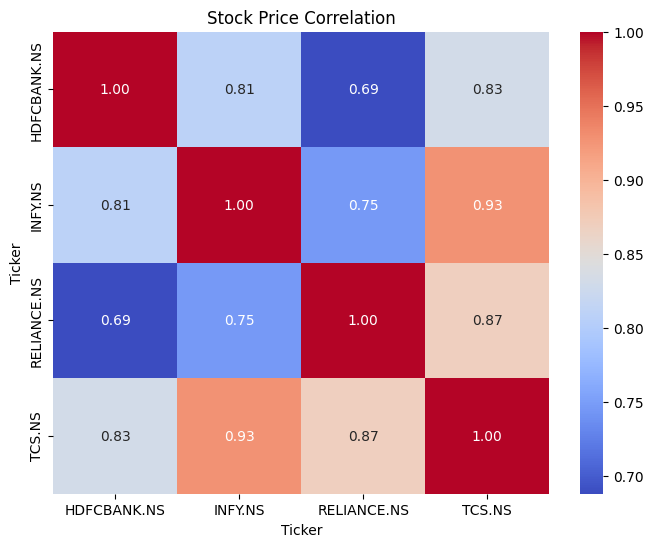

In [12]:
# Computing correlation matrix
correlation = stock_data['Close'].corr()

# Plotting heatmap
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Stock Price Correlation")
plt.show()

In [13]:
# Flattening the MultiIndex columns
stock_data.columns = ['_'.join(col).strip() for col in stock_data.columns]

# Resetting index to bring Date as a column
stock_data.reset_index(inplace=True)

# Renaming columns for better understanding
stock_data.rename(columns={'Date': 'date'}, inplace=True)

# Displaying the cleaned data
stock_data.head()


,date,Close_HDFCBANK.NS,Close_INFY.NS,Close_RELIANCE.NS,Close_TCS.NS,High_HDFCBANK.NS,High_INFY.NS,High_RELIANCE.NS,High_TCS.NS,Low_HDFCBANK.NS,...,Low_RELIANCE.NS,Low_TCS.NS,Open_HDFCBANK.NS,Open_INFY.NS,Open_RELIANCE.NS,Open_TCS.NS,Volume_HDFCBANK.NS,Volume_INFY.NS,Volume_RELIANCE.NS,Volume_TCS.NS
0,2020-03-30,798.366211,562.363098,459.428864,1632.521484,851.501002,595.385206,479.202430,1748.638419,794.862266,...,454.769717,1618.798619,844.781152,560.927321,463.954288,1621.047479,19634222,14624804,30229866,8513547
1,2020-03-31,827.405640,575.643799,496.568359,1676.214355,838.637343,594.039275,503.724268,1702.742276,804.462126,...,467.253552,1633.898249,819.629777,583.271191,478.823425,1686.586900,17605546,15175521,44292810,3927593
2,2020-04-01,796.446289,540.916748,481.721497,1568.496216,829.277511,572.054469,501.405865,1684.154166,787.182472,...,466.005193,1562.300254,829.277511,569.227825,500.358111,1676.030595,14551752,13083824,41597459,4941878
3,2020-04-03,781.278503,525.572266,480.383881,1518.423828,810.221880,543.788264,505.797498,1597.181441,777.582610,...,470.954099,1514.568607,809.261901,541.544913,505.797498,1597.181441,17498140,10221655,41367807,5735369
4,2020-04-07,860.236877,573.400452,537.742859,1629.492310,870.988650,578.111488,541.265054,1639.268185,811.517959,...,490.437877,1565.054340,839.021372,551.864284,491.374170,1569.643942,30206319,15145605,54373624,5427577


In [14]:
# Checking for missing values
print(stock_data.isnull().sum())

# Filling missing values using forward-fill method
stock_data.fillna(method='ffill', inplace=True)

# If still missing, using backward fill as a backup
stock_data.fillna(method='bfill', inplace=True)

print(stock_data.isnull().sum())


date                  0
Close_HDFCBANK.NS     0
Close_INFY.NS         0
Close_RELIANCE.NS     0
Close_TCS.NS          0
High_HDFCBANK.NS      0
High_INFY.NS          0
High_RELIANCE.NS      0
High_TCS.NS           0
Low_HDFCBANK.NS       0
Low_INFY.NS           0
Low_RELIANCE.NS       0
Low_TCS.NS            0
Open_HDFCBANK.NS      0
Open_INFY.NS          0
Open_RELIANCE.NS      0
Open_TCS.NS           0
Volume_HDFCBANK.NS    0
Volume_INFY.NS        0
Volume_RELIANCE.NS    0
Volume_TCS.NS         0
dtype: int64
date                  0
Close_HDFCBANK.NS     0
Close_INFY.NS         0
Close_RELIANCE.NS     0
Close_TCS.NS          0
High_HDFCBANK.NS      0
High_INFY.NS          0
High_RELIANCE.NS      0
High_TCS.NS           0
Low_HDFCBANK.NS       0
Low_INFY.NS           0
Low_RELIANCE.NS       0
Low_TCS.NS            0
Open_HDFCBANK.NS      0
Open_INFY.NS          0
Open_RELIANCE.NS      0
Open_TCS.NS           0
Volume_HDFCBANK.NS    0
Volume_INFY.NS        0
Volume_RELIANCE.NS    0
Vol

C:\Users\hp\AppData\Local\Temp\ipykernel_10636\961816265.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_10636\961816265.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='bfill', inplace=True)


In [15]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Feature Engineering
close_prices = stock_data.filter(like="Close").rename(columns=lambda x: x.replace("Close_", ""))
volume = stock_data.filter(like="Volume").rename(columns=lambda x: x.replace("Volume_", ""))

def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=period).mean()
    avg_loss = pd.Series(loss).rolling(window=period).mean()
    rs = np.where(avg_loss == 0, 100, avg_gain / (avg_loss + 1e-10))
    return 100 - (100 / (1 + rs))

def calculate_obv(price, vol):
    return (np.sign(price.diff()) * vol).cumsum()

def stochastic_oscillator(price, period=14):
    lowest_low = price.rolling(period).min()
    highest_high = price.rolling(period).max()
    return 100 * ((price - lowest_low) / (highest_high - lowest_low))

for stock in close_prices.columns:
    close_prices[f"SMA_50_{stock}"] = close_prices[stock].rolling(window=50).mean()
    close_prices[f"SMA_200_{stock}"] = close_prices[stock].rolling(window=200).mean()
    close_prices[f"EMA_50_{stock}"] = close_prices[stock].ewm(span=50, adjust=False).mean()
    close_prices[f"EMA_200_{stock}"] = close_prices[stock].ewm(span=200, adjust=False).mean()
    close_prices[f"RSI_{stock}"] = calculate_rsi(close_prices[stock])
    close_prices[f"MACD_{stock}"] = close_prices[stock].ewm(span=12).mean() - close_prices[stock].ewm(span=26).mean()
    close_prices[f"MACD_Signal_{stock}"] = close_prices[f"MACD_{stock}"].ewm(span=9).mean()
    close_prices[f"Bollinger_Upper_{stock}"] = close_prices[stock].rolling(20).mean() + 2 * close_prices[stock].rolling(20).std()
    close_prices[f"Bollinger_Lower_{stock}"] = close_prices[stock].rolling(20).mean() - 2 * close_prices[stock].rolling(20).std()
    close_prices[f"OBV_{stock}"] = calculate_obv(close_prices[stock], volume[stock])
    close_prices[f"Stochastic_{stock}"] = stochastic_oscillator(close_prices[stock])

close_prices.dropna(inplace=True)
close_prices.reset_index(inplace=True)

In [16]:
# Data Preparation
target_stock = "RELIANCE.NS"
feature_cols = [col for col in close_prices.columns if target_stock in col and "date" not in col]
X = close_prices[feature_cols].values
y = close_prices[f"{target_stock}"].values.reshape(-1, 1)

scaler_X, scaler_y = MinMaxScaler((0, 1)), MinMaxScaler((0, 1))
X_scaled, y_scaled = scaler_X.fit_transform(X), scaler_y.fit_transform(y)

def create_sequences(X, y, time_steps=180):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i : i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps=180)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

In [17]:
# Building LSTM Model
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    BatchNormalization(), Dropout(0.2),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(), Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(), Dropout(0.2),
    LSTM(32, return_sequences=False),
    BatchNormalization(), Dropout(0.2),
    Dense(25, activation="relu"),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.Huber())
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_reduction])

D:\Data Science Projects\AI-Powered Stock Market Sentiment Analysis & Price Prediction\stock_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - loss: 0.2763 - val_loss: 0.2072 - learning_rate: 0.0010
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 0.1507 - val_loss: 0.1283 - learning_rate: 0.0010
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - loss: 0.0830 - val_loss: 0.1528 - learning_rate: 0.0010
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.0631 - val_loss: 0.1028 - learning_rate: 0.0010
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - loss: 0.0394 - val_loss: 0.1062 - learning_rate: 0.0010
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - loss: 0.0321 - val_loss: 0.0879 - learning_rate: 0.0010
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - loss: 0.0268 - val_loss: 0.0693 - learning_rate: 0.0010
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - loss: 0.0234 - val_loss: 0.0734 - learning_rate: 0.0010
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - loss: 0.0224 - val_loss: 0.0478 - learning_rate: 0.0010
Epoch 10/100
22/22 

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 581ms/step


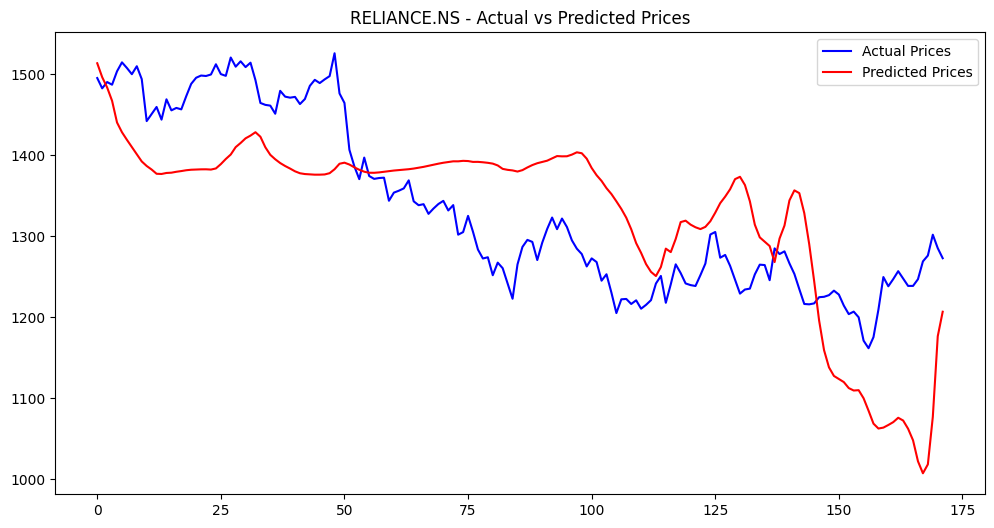

In [18]:
# Predictions & Visualization
y_pred = model.predict(X_test)
y_pred_actual, y_test_actual = scaler_y.inverse_transform(y_pred), scaler_y.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Prices", color="blue")
plt.plot(y_pred_actual, label="Predicted Prices", color="red")
plt.legend()
plt.title(f"{target_stock} - Actual vs Predicted Prices")
plt.show()

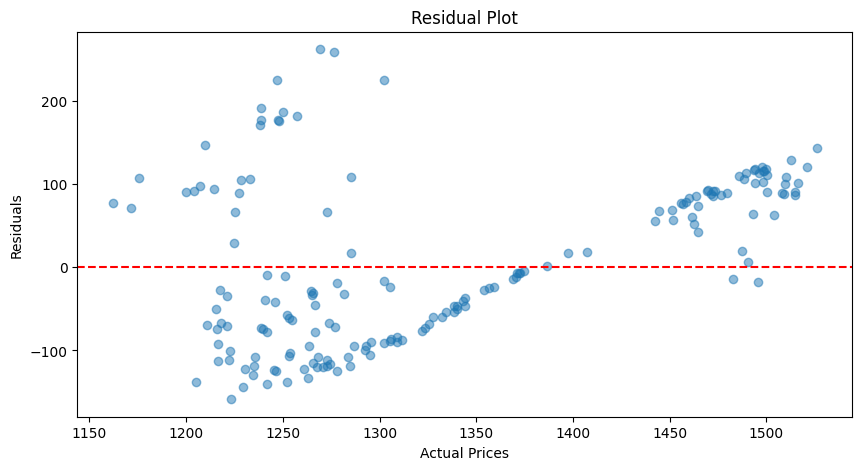

In [19]:
# Residuals Analysis
residuals = y_test_actual - y_pred_actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test_actual, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.1132
Root Mean Squared Error (RMSE): 0.1295
R² Score: 0.1531


In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate if no improvement
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train Model
history = model.fit(X_train, y_train, 
                    epochs=200, batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 0.0058 - val_loss: 0.0084 - learning_rate: 1.0000e-06
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - loss: 0.0050 - val_loss: 0.0084 - learning_rate: 1.0000e-06
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - loss: 0.0054 - val_loss: 0.0084 - learning_rate: 1.0000e-06
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - loss: 0.0069 - val_loss: 0.0084 - learning_rate: 1.0000e-06
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.0054 - val_loss: 0.0084 - learning_rate: 1.0000e-06
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.0061 - val_loss: 0.0084 - learning_rate: 1.0000e-06
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.0055 - val_loss: 0.0084 - learning_rate: 1.0000e-06
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.0055 - val_loss: 0.0084 - learning_rate: 1.0000e-06
Epoch 9/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 0.0071 - val_loss: 0.0084 - learning_

In [26]:
import pickle

# Save the model
model.save("lstm_stock_model.h5")

# Save the scalers (for consistent normalization during inference)
with open("scaler_X.pkl", "wb") as f:
    pickle.dump(scaler_X, f)

with open("scaler_y.pkl", "wb") as f:
    pickle.dump(scaler_y, f)

print("Model and scalers saved successfully!")


Model and scalers saved successfully!


Model and scalers loaded successfully!


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step


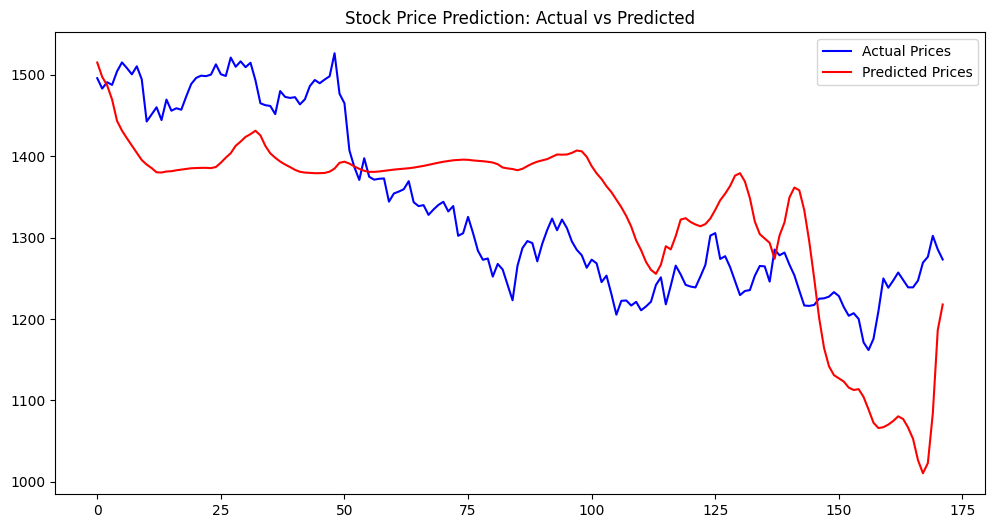

In [27]:
from tensorflow.keras.models import load_model

# Loading model
model = load_model("lstm_stock_model.h5")

# Loading scalers
with open("scaler_X.pkl", "rb") as f:
    scaler_X = pickle.load(f)

with open("scaler_y.pkl", "rb") as f:
    scaler_y = pickle.load(f)

print("Model and scalers loaded successfully!")

# Making predictions
y_pred = model.predict(X_test)

# Converting predictions back to original scale
y_pred_actual = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Prices", color="blue")
plt.plot(y_pred_actual, label="Predicted Prices", color="red")
plt.legend()
plt.title("Stock Price Prediction: Actual vs Predicted")
plt.show()
